In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("d.csv")


In [3]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
dataset.shape

(768, 9)

In [5]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [7]:
x=dataset.drop(columns="Outcome",axis=1)
y=dataset["Outcome"]

In [8]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [9]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [10]:
scaler = StandardScaler()
scaler.fit(x)
standardized = scaler.transform(x)


In [11]:
standardized

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [12]:
x=standardized
y=dataset["Outcome"]

In [13]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [14]:
x.shape

(768, 8)

In [15]:
xtrain.shape,xtest.shape

((614, 8), (154, 8))

SUPPORT VECTOR MACHINE

In [16]:
classifier = svm.SVC(kernel='linear')
classifier.fit(xtrain, ytrain)


SVC(kernel='linear')

In [17]:
xtrainPrediction=classifier.predict(xtrain)
training_data_accuracy=accuracy_score(xtrainPrediction,ytrain)

In [18]:
print(f"SVM Training Accuracy: {training_data_accuracy}")

SVM Training Accuracy: 0.7866449511400652


In [19]:
xtestPrediction = classifier.predict(xtest)
test_data_accuracy = accuracy_score(xtestPrediction, ytest)
print(f"SVM Test Accuracy: {test_data_accuracy}")


SVM Test Accuracy: 0.7727272727272727


LINEAR REGRESSION

In [20]:
linear_regressor = LinearRegression()
linear_regressor.fit(xtrain, ytrain)

LinearRegression()

In [21]:
linear_train_pred = np.round(linear_regressor.predict(xtrain))
linear_test_pred = np.round(linear_regressor.predict(xtest))


In [22]:
linear_train_acc = accuracy_score(linear_train_pred, ytrain)
linear_test_acc = accuracy_score(linear_test_pred, ytest)
print(f"Linear Regression Training Accuracy: {linear_train_acc}")
print(f"Linear Regression Test Accuracy: {linear_test_acc}")


Linear Regression Training Accuracy: 0.7817589576547231
Linear Regression Test Accuracy: 0.7402597402597403


LOGISTIC REGRESSION

In [23]:
logistic_regressor = LogisticRegression()
logistic_regressor.fit(xtrain, ytrain)


LogisticRegression()

In [24]:
log_train_pred = logistic_regressor.predict(xtrain)
log_test_pred = logistic_regressor.predict(xtest)


In [25]:
log_train_acc = accuracy_score(log_train_pred, ytrain)
log_test_acc = accuracy_score(log_test_pred, ytest)
print(f"Logistic Regression Training Accuracy: {log_train_acc}")
print(f"Logistic Regression Test Accuracy: {log_test_acc}")


Logistic Regression Training Accuracy: 0.7850162866449512
Logistic Regression Test Accuracy: 0.7597402597402597


K-NEAREST NEIGHBORS (KNN)

In [26]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(xtrain, ytrain)


KNeighborsClassifier()

In [27]:
knn_train_pred = knn_classifier.predict(xtrain)
knn_test_pred = knn_classifier.predict(xtest)


In [28]:
knn_train_acc = accuracy_score(knn_train_pred, ytrain)
knn_test_acc = accuracy_score(knn_test_pred, ytest)
print(f"KNN Training Accuracy: {knn_train_acc}")
print(f"KNN Test Accuracy: {knn_test_acc}")

KNN Training Accuracy: 0.8289902280130294
KNN Test Accuracy: 0.7207792207792207


RANDOM FOREST

In [29]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=2)
rf_classifier.fit(xtrain, ytrain)

RandomForestClassifier(random_state=2)

In [30]:
rf_train_pred = rf_classifier.predict(xtrain)
rf_train_acc = accuracy_score(rf_train_pred, ytrain)
print(f"Random Forest Training Accuracy: {rf_train_acc}")
rf_test_pred = rf_classifier.predict(xtest)
rf_test_acc = accuracy_score(rf_test_pred, ytest)
print(f"Random Forest Test Accuracy: {rf_test_acc}")


Random Forest Training Accuracy: 1.0
Random Forest Test Accuracy: 0.7272727272727273


In [31]:
input_data = (4, 146, 92, 0, 0, 31.2, 0.539, 61)
array = np.array(input_data)
input_reshape = array.reshape(1, -1)
std_data = scaler.transform(input_reshape)

svm_prediction = classifier.predict(std_data)
if svm_prediction[0] == 0:
    print("SVM Prediction: No Diabetes")
else:
    print("SVM Prediction: Has Diabetes")

logistic_prediction = logistic_regressor.predict(std_data)
if logistic_prediction[0] == 0:
    print("Logistic Regression Prediction: No Diabetes")
else:
    print("Logistic Regression Prediction: Has Diabetes")

linear_input_pred = np.round(linear_regressor.predict(std_data))
print("Linear Regression Prediction:", "No Diabetes" if linear_input_pred[0] == 0 else "Has Diabetes")
    
knn_prediction = knn_classifier.predict(std_data)
if knn_prediction[0] == 0:
    print("KNN Prediction: No Diabetes")
else:
    print("KNN Prediction: Has Diabetes")

rf_prediction = rf_classifier.predict(std_data)
print("Random Forest Prediction:", "No Diabetes" if rf_prediction[0] == 0 else "Has Diabetes")

SVM Prediction: Has Diabetes
Logistic Regression Prediction: Has Diabetes
Linear Regression Prediction: Has Diabetes
KNN Prediction: No Diabetes
Random Forest Prediction: Has Diabetes


C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


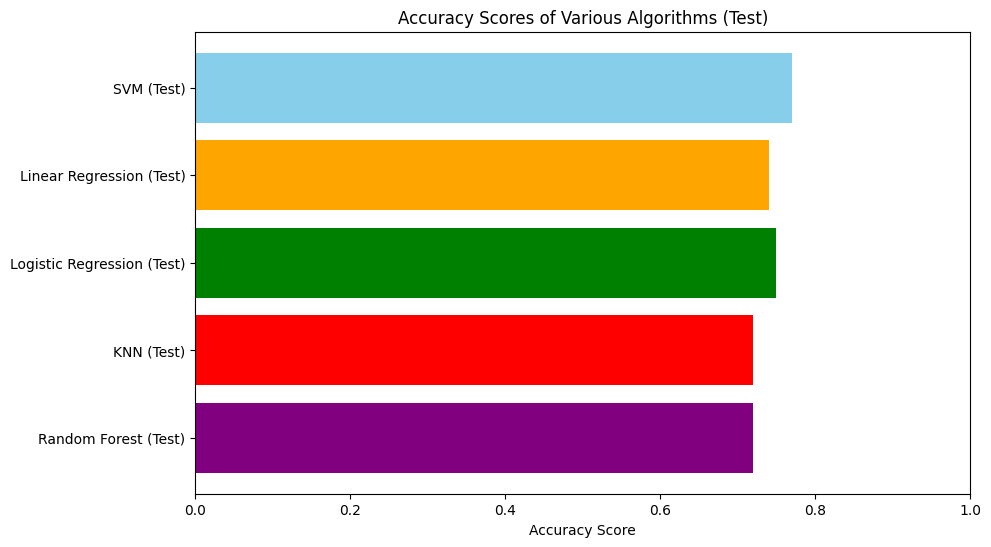

In [32]:

accuracy_scores = {
    "SVM (Test)": 0.77,
    "Linear Regression (Test)": 0.74,
    "Logistic Regression (Test)": 0.75,
    "KNN (Test)": 0.72,
    "Random Forest (Test)": 0.72
}
algorithms = list(accuracy_scores.keys())
scores = list(accuracy_scores.values())
colors = ['skyblue', 'orange', 'green', 'red', 'purple']
plt.figure(figsize=(10, 6))
plt.barh(algorithms, scores, color=colors)
plt.xlabel("Accuracy Score")
plt.title("Accuracy Scores of Various Algorithms (Test)")
plt.xlim(0, 1)  
plt.gca().invert_yaxis()  
plt.show()
